Analyze resumes determine the important skills present in the resumes

In [7]:
pip install pandas nltk requests

Step-1 : Import Necessary libraries

In [8]:
import pandas as pd

Step-2 : Load dataset

In [9]:
df = pd.read_csv('Resume.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [10]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


Step-3 : Named Entities Recognisation

In [11]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
from nltk import word_tokenize,pos_tag,ne_chunk
from nltk.tree import Tree
import re

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [12]:
def extract_named_entities(text):
  entities={'PERSON':[],'ORGANIZATION':[],'GPE':[]}
  chunk=ne_chunk(pos_tag(word_tokenize(text)))
  for tree in chunk:
    if isinstance(tree,Tree):
      Label=tree.label()
      Entity=''.join(token for token,_ in tree.leaves())
      if Label in entities:
        entities[Label].append(Entity)
  return entities

Step-4 : Skills Extracting function

In [13]:
common_skills=set(['Python','Java','SQL','Excel','Leadership','Communication'])
def extract_skills(text):
  token=set(word_tokenize(text))
  return list(common_skills.intersection(token))

Step-5: Process Sample Resume

In [21]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
sample_resume=df['Resume_str'].iloc[2]
ner=extract_named_entities(sample_resume)
ner

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


{'PERSON': ['BenefitAdministrationPolicy',
  'KansasHealthInstitute',
  'Kansas',
  'HonorRoll',
  'Dean',
  'HonorRoll',
  'StudentLiaison',
  'KansasTravel',
  'Tourism',
  'Change',
  'HumanResourceCoordinator',
  'ExperienceHR',
  'CurrentCompanyNameCity',
  'Agency',
  'Developed',
  'Oversaw',
  'State',
  'Ramp',
  'Payroll',
  'QualityControl',
  'AgencyStaffing',
  'PersonOffice',
  'WorkComp',
  'Benefits',
  'State',
  'State',
  'HonorsTopeka',
  'KansasHospital',
  'CareHuman',
  'LiaisonSkillsDesktopPublishing',
  'AgencyAutomation',
  'Benefits',
  'CorelSuite',
  'HarvardGraphics',
  'Excel',
  'MicrosoftPublisher',
  'QuarkExpress',
  'QuattroPro',
  'StrategicPlanning'],
 'ORGANIZATION': ['Human',
  'HRIS',
  'HealthcareEnviromentSkills',
  'ManagementInstitute',
  'SHRM',
  'Commerce',
  'FriendsUniversityTopeka',
  'Topeka',
  'ADDYAwards',
  'ASHHRA',
  'KAHHR',
  'ACM',
  'Adjutant',
  'Retention',
  'Adjutant',
  'Federal',
  'JointForcesHeadquarters',
  'Federal

In [22]:
skills=extract_skills(sample_resume)
skills

['Leadership', 'Excel']

In [23]:
category = df['Category'].iloc[2]
category

'HR'

Step-6: Applying First 10 rows

In [24]:
result=[]
for i,j in df.head(10).iterrows():
  text = j['Resume_str']
  ner=extract_named_entities(text)
  skills=extract_skills(text)
  result.append({'ID':j['ID'],
                 'Category':j['Category'],
                 'Skills':skills,
                 'Entities':ner
                 })
  result_df=pd.DataFrame(result)

In [25]:
result

[{'ID': 16852973,
  'Category': 'HR',
  'Skills': ['Leadership'],
  'Entities': {'PERSON': ['Client',
    'AccomplishmentsMissouri',
    'ManagerTraining',
    'HiltonOnQ',
    'MicrosOperaPMS',
    'FidelioOPERA',
    'HolidexCompleted',
    'ExperienceHR',
    'CurrentCompanyName',
    'AdvancedMedicalClaimsAnalystMar',
    'ManagerJun',
    'Hired',
    'ExecutiveSupport',
    'State',
    'Marketing',
    'FrontOfficeManager',
    'PartnerDec',
    'Business',
    'JeffersonCollege',
    'SchoolDiploma',
    'CollegePrep',
    'State',
    'JeffersonCollegeSkillsAccounting',
    'Marketing'],
   'ORGANIZATION': ['ASSOCIATE',
    'CustomerServiceManagement',
    'IHG',
    'SegmentHilton',
    'ORS',
    'StateHelps',
    'Administers',
    'StateReviewed',
    'CPT',
    'State',
    'Commerce',
    'CustomerService',
    'HumanResources',
    'State',
    'State',
    'StateEducation',
    'StateBusinessAdministration',
    'AmericanShrubelLeadership',
    'CustomerService',
    '

In [28]:
result_df

,ID,Category,Skills,Entities
0,16852973,HR,[Leadership],"{'PERSON': ['Client', 'AccomplishmentsMissouri..."
1,22323967,HR,[Communication],"{'PERSON': ['Marketing', 'CurrentHRSpecialist'..."
2,33176873,HR,"[Leadership, Excel]","{'PERSON': ['BenefitAdministrationPolicy', 'Ka..."
3,27018550,HR,[Excel],"{'PERSON': ['Dynamic', 'Solid', 'SkillsType', ..."
4,17812897,HR,[Excel],"{'PERSON': ['SkillHighlightsHR', 'AdvocacyHRPo..."
5,11592605,HR,[Excel],"{'PERSON': ['AdministrativeAssistant', 'Highli..."
6,25824789,HR,[Leadership],"{'PERSON': ['State', 'HighlightsUniversity', '..."
7,15375009,HR,[],"{'PERSON': ['DrivenHRManager', 'CreativeBusine..."
8,11847784,HR,[Excel],"{'PERSON': ['Managed', 'Ensured', 'Developed',..."
9,32896934,HR,[],"{'PERSON': ['SixSigma', 'HighlightsNewEmployee..."


Step-7: Visualize Skill Distribution

In [30]:
list1=['Python']
list2=['Java']
list3=['SQL']

In [32]:
list4=[]
list4.extend(list1)
list4

['Python']

In [33]:
from collections import Counter
import matplotlib.pyplot as plt

skills=[]
for i in result_df['Skills']:
  skills.extend(i)

skill_freq=Counter(skills)
skill_freq

Counter({'Leadership': 3, 'Communication': 1, 'Excel': 5})

In [34]:
top=skill_freq.most_common(10)
labels,values=zip(*top)

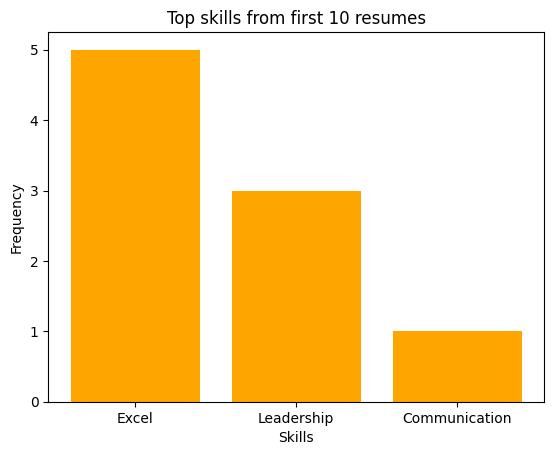

In [37]:
plt.bar(labels,values,color='orange')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Top skills from first 10 resumes')
plt.show()